# **Data Visualisation**

## Objectives

To Analyse the database to determine what part do various factor play in the make up of costs:
* Principally to determine how big a factor BMI, categorised according to recognised levels ( [AmericanCancerSociety](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/body-mass-index-bmi-calculator.html)), and if costs increase dramatically with high level of BMI (obesity)
* To determine how big a factor smoking and age are on costs in comparison to BMI
* Are there multiplier effects - e.g. a combination of high BMI, smoking and age 
* What part to secondary factors such as region and sex play in overall costs

## Inputs

* Data to be read from insurance_cleaned.csv - other links to external sources of information

## Outputs

* Charts/plots to visualise and analyse data:
    * Matplotlib to provide initial visualisations of data
    * Seaborn to show correlations between data
    * Plotly to show more detailed and granular information
* Commentary on visualisations
* How does information presented relate to the objectives above.

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Projects_Python\\HealthInsuranceAnalysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Projects_Python\\HealthInsuranceAnalysis'

# Section 1

Load Dataset and visualisation with matplotlib

In [4]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Load dataset for visualization 
#load insurance_cleaned.csv in Datasets/Processed folder
df = pd.read_csv('Datasets/Processed/insurance_cleaned.csv')
df

,age,sex,bmi,smoker,region,charges,bmi_category,charges_category
0,19,female,27.900,yes,0,16884.92400,Overweight,Medium
1,18,male,33.770,no,1,1725.55230,Obese,Low
2,28,male,33.000,no,1,4449.46200,Obese,Low
3,33,male,22.705,no,2,21984.47061,Healthy,High
4,32,male,28.880,no,2,3866.85520,Overweight,Low
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,no,2,10600.54830,Obese,Medium
1333,18,female,31.920,no,3,2205.98080,Obese,Low
1334,18,female,36.850,no,1,1629.83350,Obese,Low
1335,21,female,25.800,no,0,2007.94500,Overweight,Low


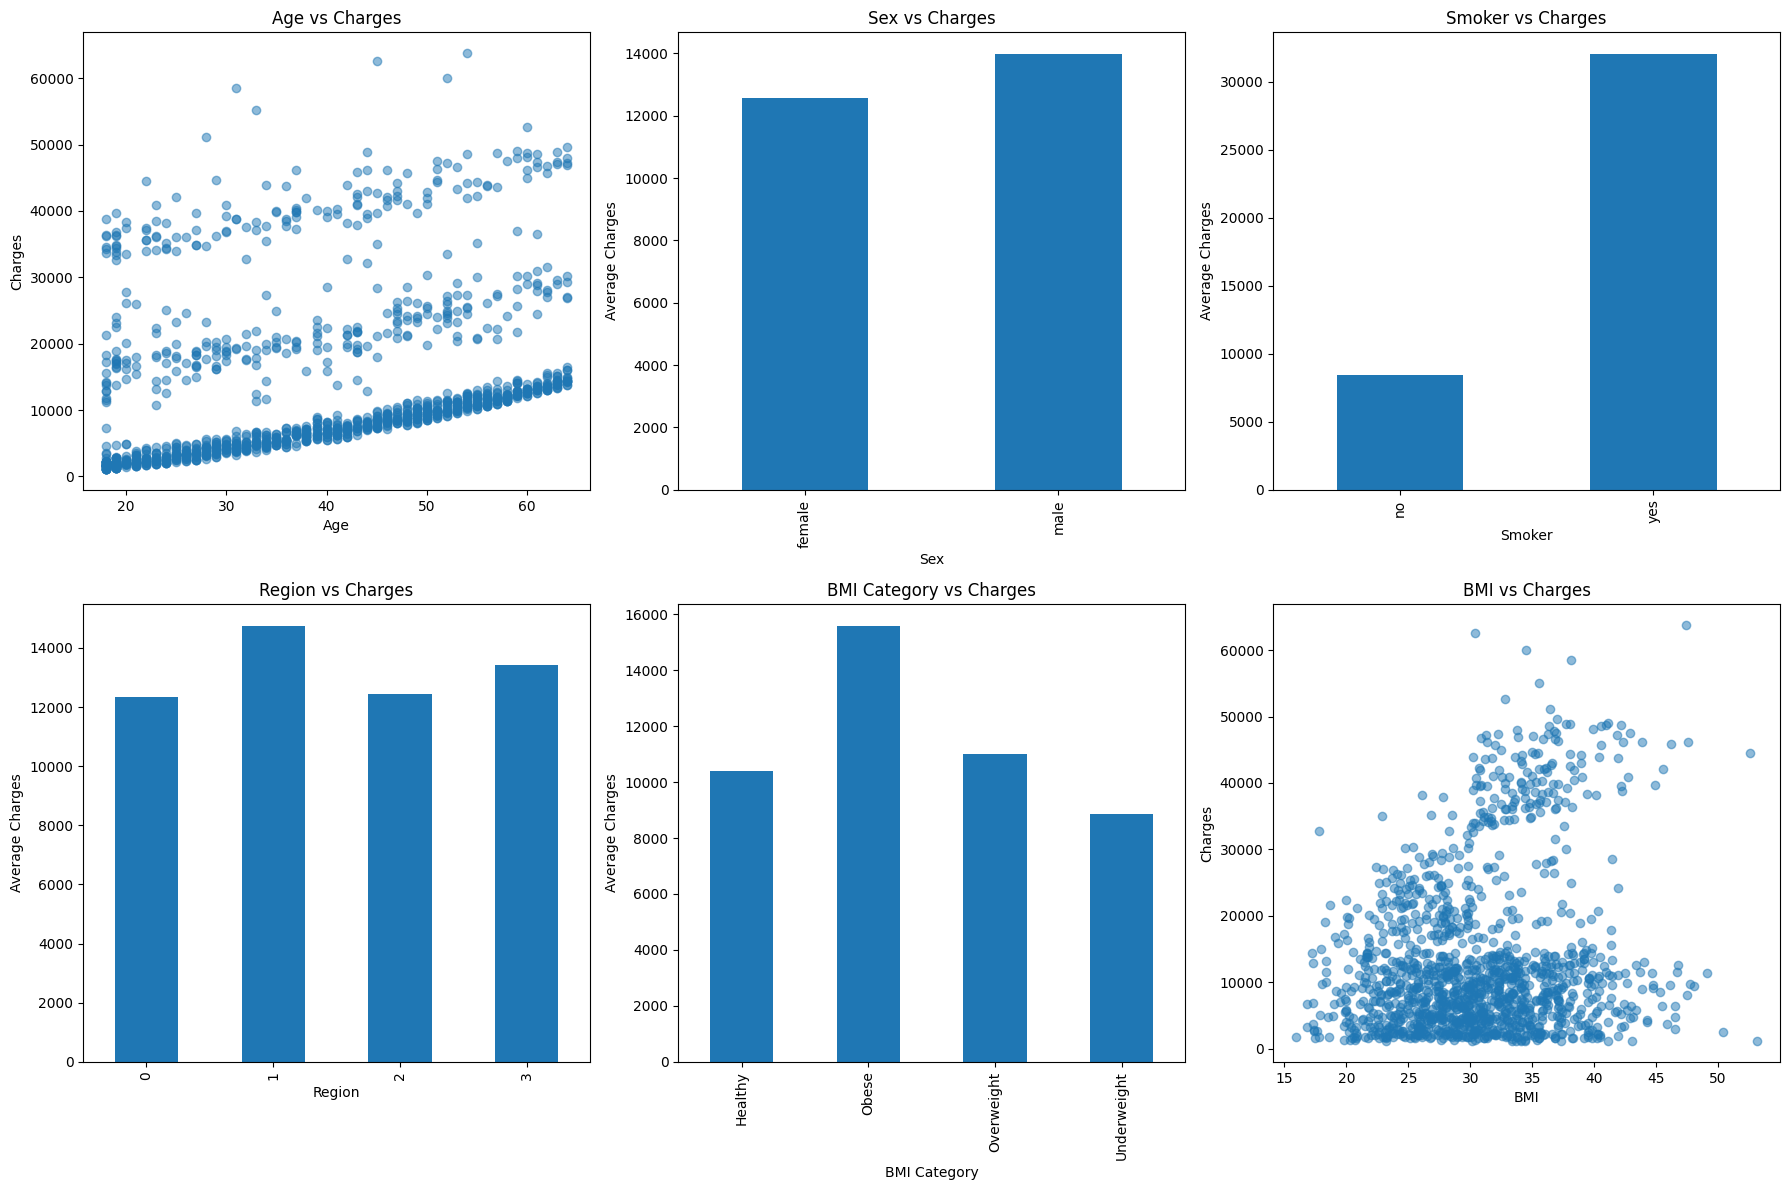

In [6]:
#create plots with matplotlib detailing charges in comparison to age, sex, smoker,region,bmi  and bmi_category
# add plot for BMI vs Charges

plt.figure(figsize=(18, 12))

# Age vs Charges
plt.subplot(2, 3, 1)
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Sex vs Charges
plt.subplot(2, 3, 2)
df.groupby('sex')['charges'].mean().plot(kind='bar')
plt.title('Sex vs Charges')
plt.xlabel('Sex')
#plt.xticks(ticks=[0, 1], labels=['Female', 'Male']) redundant code
plt.ylabel('Average Charges')

# Smoker vs Charges
plt.subplot(2, 3, 3)
df.groupby('smoker')['charges'].mean().plot(kind='bar')
plt.title('Smoker vs Charges')
plt.xlabel('Smoker')
#plt.xticks(ticks=[0, 1], labels=['Smoker', 'Non-Smoker']) redundant code after changing smoker back to cat
plt.ylabel('Average Charges')

# Region vs Charges
plt.subplot(2, 3, 4)
df.groupby('region')['charges'].mean().plot(kind='bar')
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Average Charges')

# BMI Category vs Charges
plt.subplot(2, 3, 5)
df.groupby('bmi_category')['charges'].mean().plot(kind='bar')
plt.title('BMI Category vs Charges')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')

# BMI vs Charges
plt.subplot(2, 3, 6)
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

#### Analysis ####
As can be seen by the first plot showing the relationship between age and charges there is a steady rise in charges with age, with three distinct bands. There are small but not insignificant variations in charges between regions and according sex. The greatest differential between charges are those between smokers and non-smokers. Finally there are significant variations in charges according to bmi - from the chart showing BMI categories this is particularly striking in the obese classification.

---

# Section 2

Analysis with Seaborn

From the visualisations above it is clear there are strong relationships between charges and age, smoker status and BMI (particularly those classified as obese). In this section we will investigate these relationships further using seaborn visualisations.

In [7]:
#import seaborn
import seaborn as sns

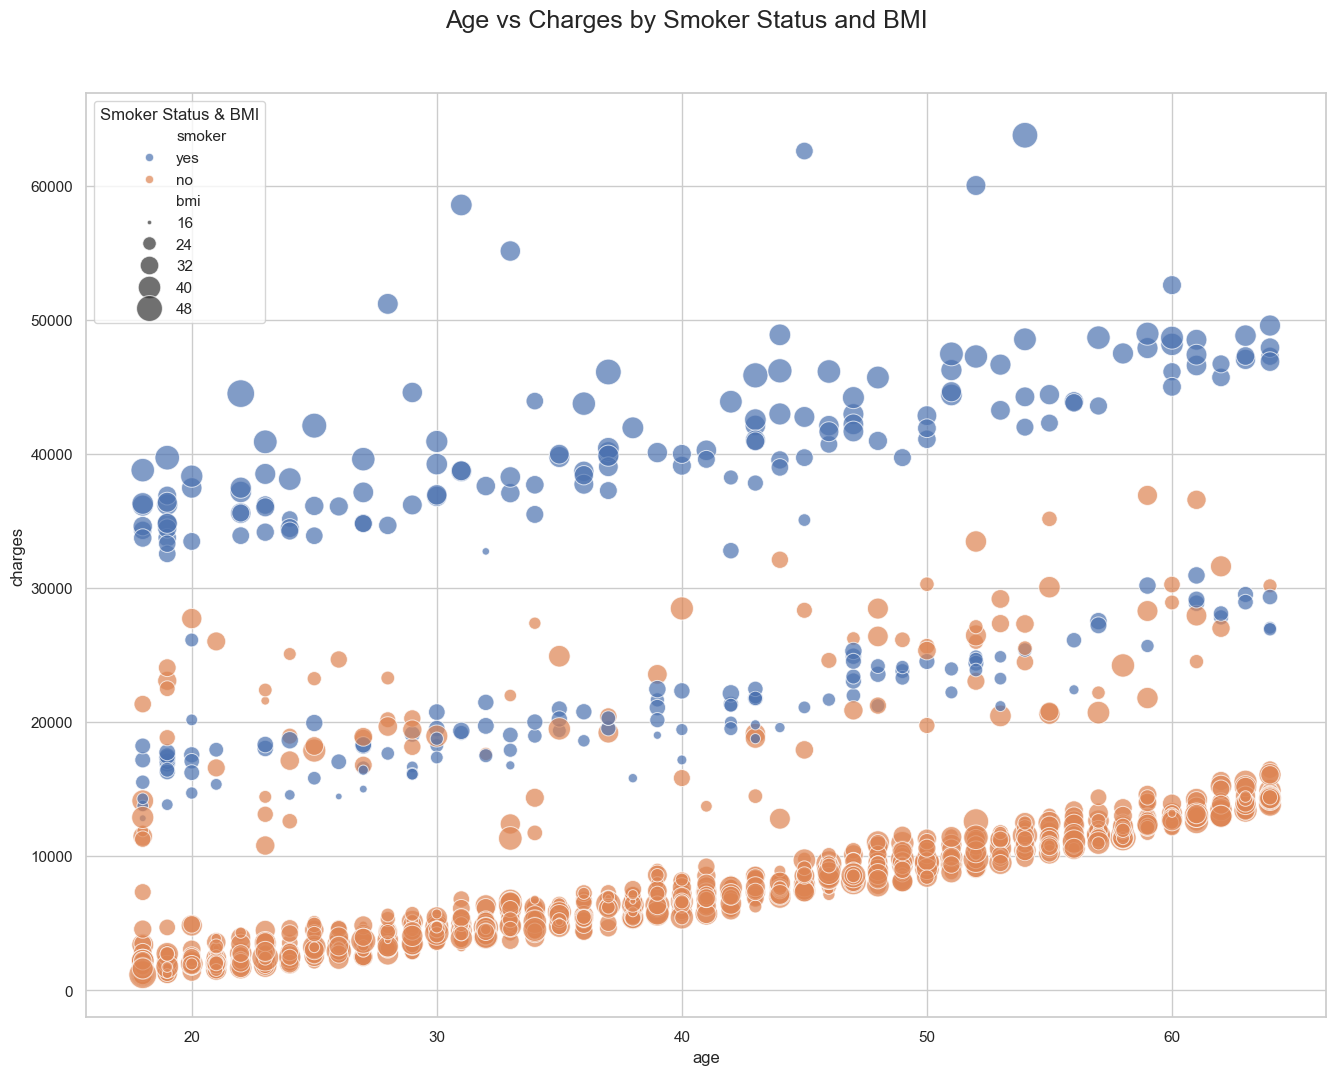

In [32]:
#plot age distribution against charges with colour determined by smoking status and BMI label smoking status smoker=0 non smoker =1
fig, axes = plt.subplots(figsize=(16, 12))
plt.suptitle('Age vs Charges by Smoker Status and BMI', fontsize=18, y=0.95)
scatter = sns.scatterplot(data=df, x='age', y='charges', hue='smoker', size='bmi',  sizes=(10, 400), alpha=0.7)
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles, labels=labels, loc='upper left', title='Smoker Status & BMI')


## TODO change the BMI legend labels not working atm


#### Analysis ####
The chart illustrates 3 clear distinctions in charges. There is a steady rise in all with age, but the highest charges are all for smokers, while the lowest band are all non smokers. In the middle the majority are all either smokers or have high BMI. So it clear that smoker status is clearly the biggest factor in high charges with BMI as a secondary, but important factor, and age as a constant.

With further visualisations I hope to get a clearer picture of the interplay of these factors.

Text(0.5, 1.02, 'Age vs Charges by BMI Category for smokers')

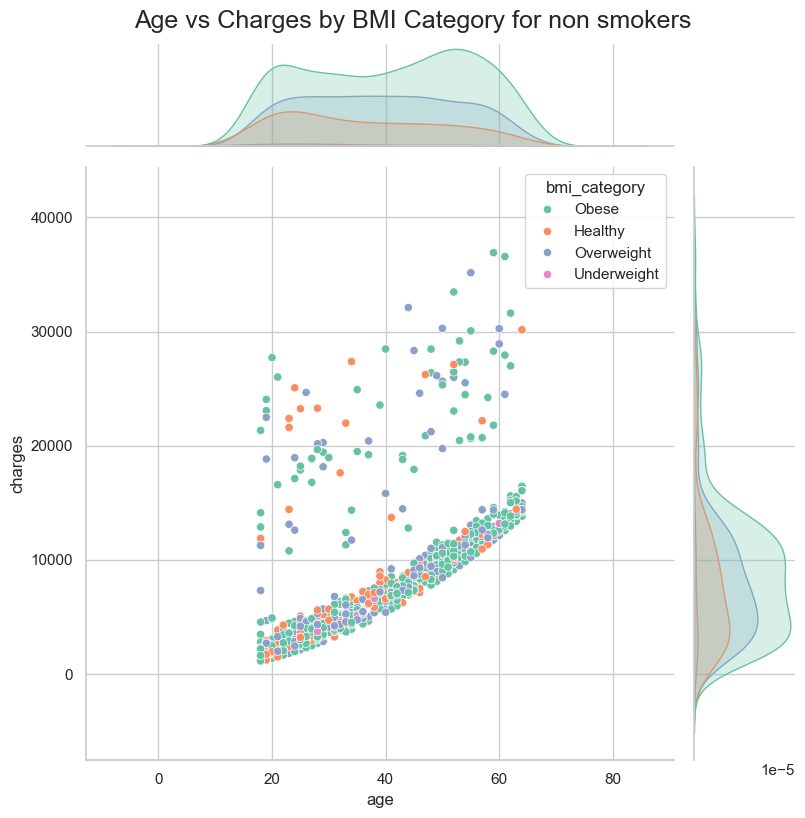

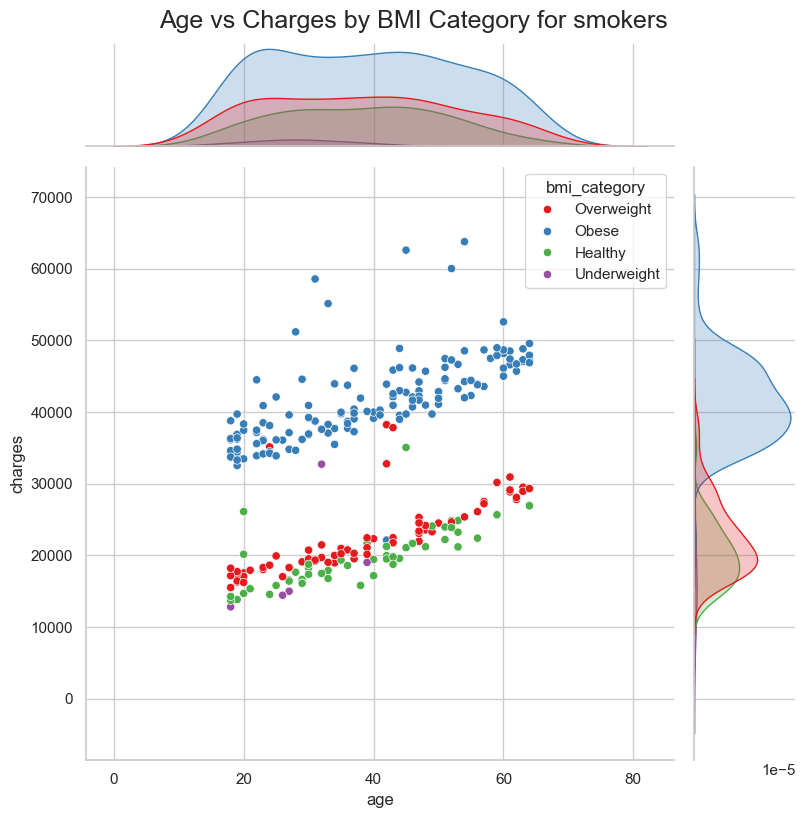

In [9]:
#seaborn jointplots showing age against charges coloured by bmi_category for smokers and non-smokers
import seaborn as sns
sns.set_theme(style="whitegrid")

# Jointplot for Non-Smokers

sns.jointplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='bmi_category', kind='scatter', height=8, palette='Set2')
plt.suptitle('Age vs Charges by BMI Category for non smokers', fontsize=18, y=1.02)
# Jointplot for Smokers

sns.jointplot(data=df[df['smoker'] == 'yes'], x='age', y='charges', hue='bmi_category', kind='scatter', height=8, palette='Set1')
plt.suptitle('Age vs Charges by BMI Category for smokers', fontsize=18, y=1.02)

#### Analysis ####
These plots show clear patterns. For non smokers is a factor in increased insurance charges, but not necessarily the only one - the highest charges are mostly for those classified as overweight or obese, but not exclusively. The range of charges is also smaller than for smokers, with the highest charges less than 40000.
However the pattern for smokers is much more clear with 2 distinct bands of charges. In the lower the charges are higher than for non smokers, but not considerably, with a small increase shown for those in the overweight classification. However the highest charges are almost exclusively for those in the obese category, with charges topping out at around 65000. 
This shows a clear multiplier effect for smokers classified as obese.

---

## Section 3 ##

### Plotly Visualisations ###

Explore the factors increasing insurance charges in more detail.

We will examine differences in charges between regions and sex, classified smoker status then BMI status

In [16]:
# create plots with plotly showing charges by region and by sex coloured by smoker status then by bmi_category
import plotly.express as px

fig = px.box(df, x="region", y="charges", color="smoker", facet_col="sex",
             title="Charges by sex and smoker status")
fig.show()


_Charges by region/sex/smoker -see Datasets/Screenshots/plotly1.png_

In [17]:

fig = px.box(df, x="region", y="charges", color="bmi_category", facet_col="sex",
             title="Charges by sex, region and BMI category")
fig.show()

_Charges by region/sex/bmi -see Datasets/Screenshots/plotly2.png_

#### Analysis ####

Interestingly these charts show some difference between sex and region. While there are small differences for sexes between regions in the first chart, charges are universally higher for smokers both male and female.
In the second chart there is a cleardifference between higher charges and obesity in men than in women. Region 2 shows a different pattern to the other regions - where the highest charges are for underweight women, the lowest for underweight men.

Finally I will endeavour to show the relative links between all factors contributing to Health Insurance cost.

In [13]:
#plotly sunburst plot showing average charges by category
#First create  df for average charges
avg_df = df.groupby(['age', 'sex', 'smoker', 'bmi_category','region'], as_index=False)['charges'].mean()
avg_df['smoker'] = avg_df['smoker'].replace({'yes': 'smoker', 'no': 'non-smoker'})
avg_df.head(8)


,age,sex,smoker,bmi_category,region,charges
0,18,female,non-smoker,Healthy,1,1904.303600
1,18,female,non-smoker,Obese,1,3639.612525
2,18,female,non-smoker,Obese,3,4476.647870
3,18,female,non-smoker,Overweight,1,1615.766700
4,18,female,non-smoker,Overweight,3,3479.807180
5,18,female,smoker,Healthy,3,14283.459400
6,18,female,smoker,Obese,1,37471.084550
7,18,female,smoker,Overweight,1,18223.451200


In [14]:
#Plotly sunburst plot showing average charges by category I have dropped region from chart to improve readability & removed values to show only average values on hover
fig = px.sunburst(
    avg_df,
    path=[ 'sex', 'smoker', 'bmi_category'],
    #values='charges',  
    color='charges',
    hover_data={'charges': ':.2f'}  # Show mean charges with 2 decimals on hover
)
fig.update_layout(title='Average Charges by Category', width=700, height=600)

_Sunburst showing mean charges by /sex/smoker/bmi -see Datasets/Screenshots/sunburst.png_

---

# Conclusions

* There were clear patterns showing various factors contributing to healthcare charges
* Age was a constant factor, showing a steady increase with age
* Sex was a smaller factor with interesting regional differences
* Smoker status was the biggest single factor in increased charges
* BMI was a compounding factor with those classified as obese facing generally much higher charges, and those in the overweight category also,to a lesser extent
* The combination of smoking and obesity showing a multiplier effect - with the highest health charges
